# Shikari King

## Research question/interests
How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

In [88]:
Data2015 = pd.read_csv('../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../data/processed/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../data/processed/Overall(With-year)_Clean_Data.csv')
DataAllRegion = pd.read_csv('../data/processed/Overall(With-Region-Year)_Clean_Data.csv')

datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022, DataCombine, DataAllYears]
for data in datasets:
    data['Country'] = data['Country'].replace('United States', 'United States of America')

# Pipeline

- Creating Economy vs Region Plot
- Happiness by region chart
- World map showing all of this

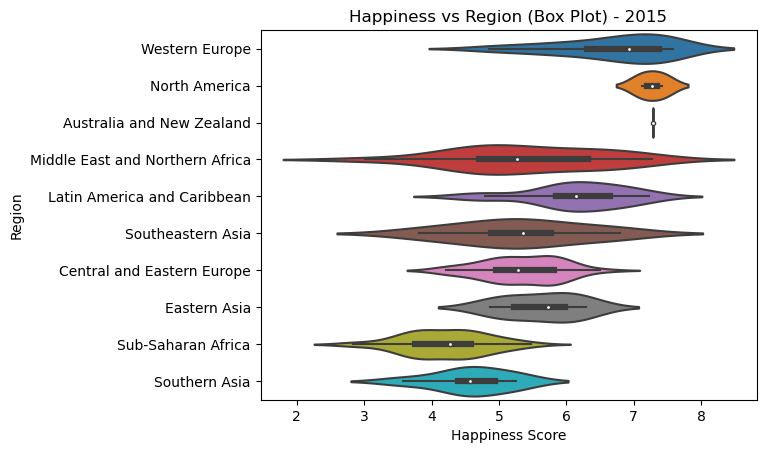

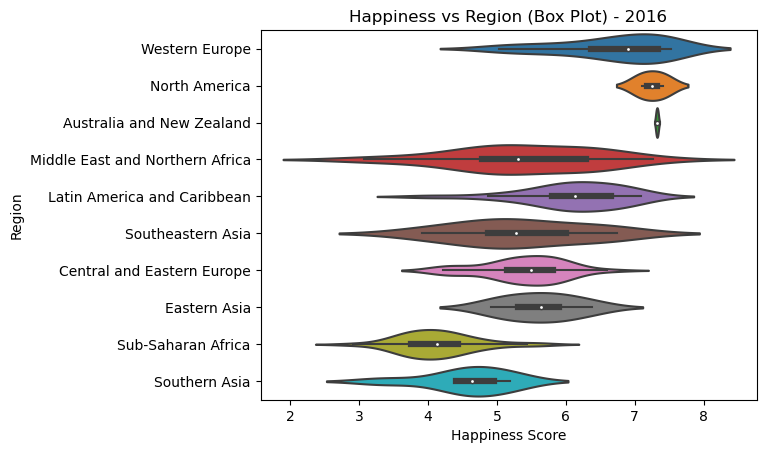

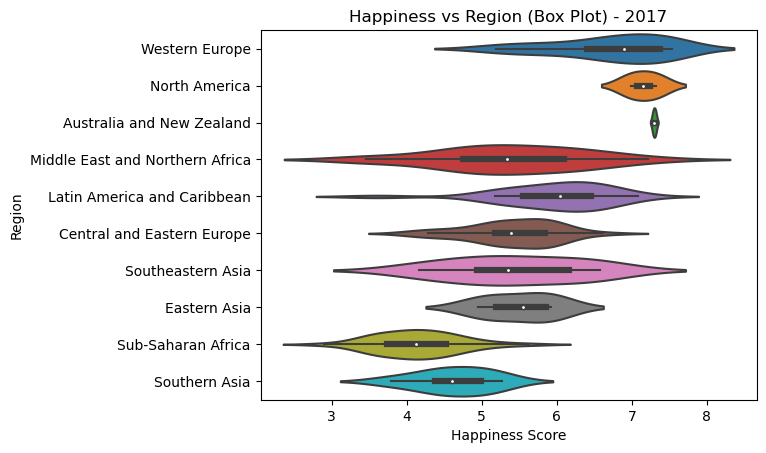

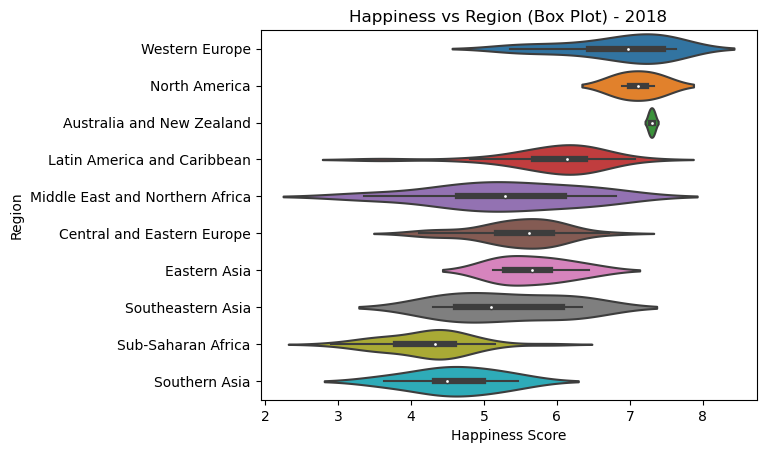

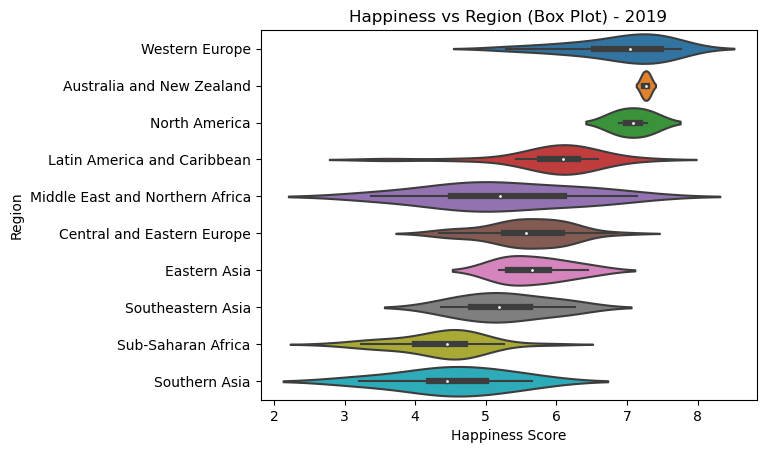

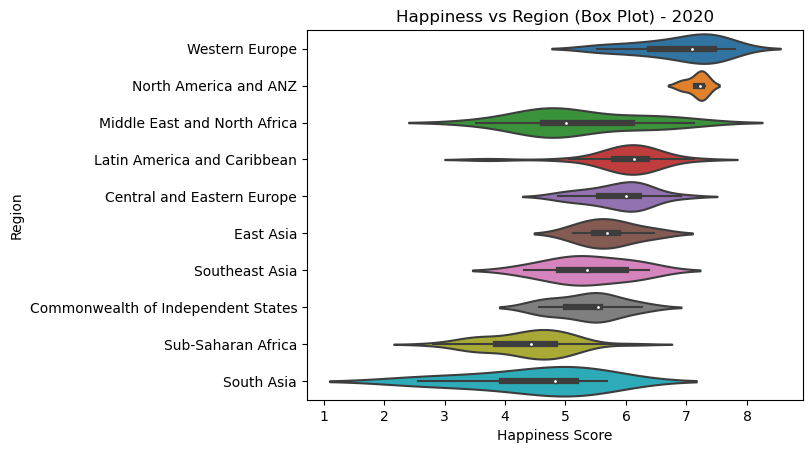

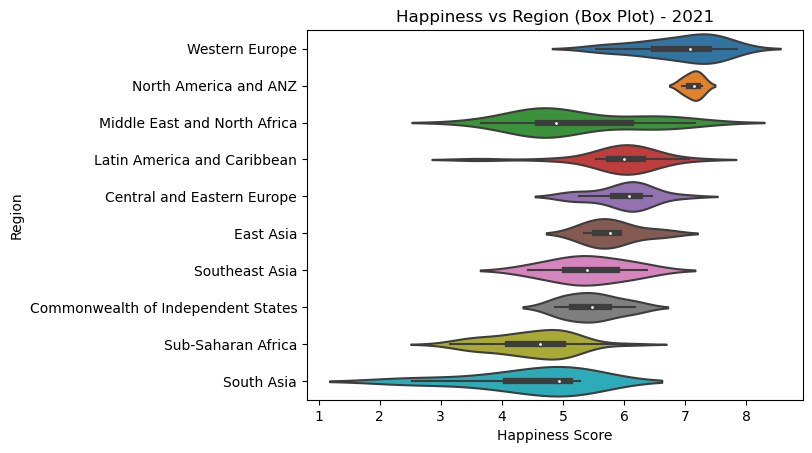

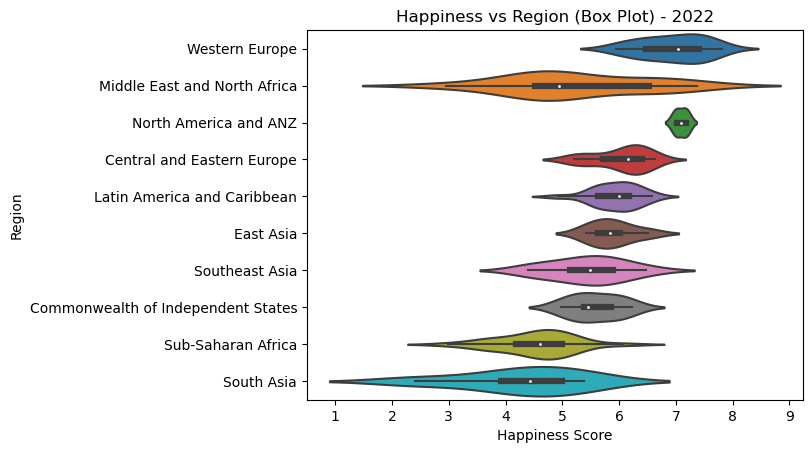

In [40]:
datasets = [(Data2015,'Happiness vs Region (Box Plot) - 2015'),
            (Data2016,'Happiness vs Region (Box Plot) - 2016'),
            (Data2017,'Happiness vs Region (Box Plot) - 2017'),
            (Data2018,'Happiness vs Region (Box Plot) - 2018'), 
            (Data2019,'Happiness vs Region (Box Plot) - 2019'),
            (Data2020,'Happiness vs Region (Box Plot) - 2020'),
            (Data2021,'Happiness vs Region (Box Plot) - 2021'),
            (Data2022,'Happiness vs Region (Box Plot) - 2022')]

for dataset, title in datasets:
    sns.violinplot(x='Happiness Score', y='Region', data=dataset, scale='width')
    plt.title(title)
    plt.ylabel('Region')
    plt.xlabel('Happiness Score')
    plt.show()

### Looking at the charts above we can clearly observe that the happiest regions are Western Europe as well as North America and they have consistenly been the happiest country.

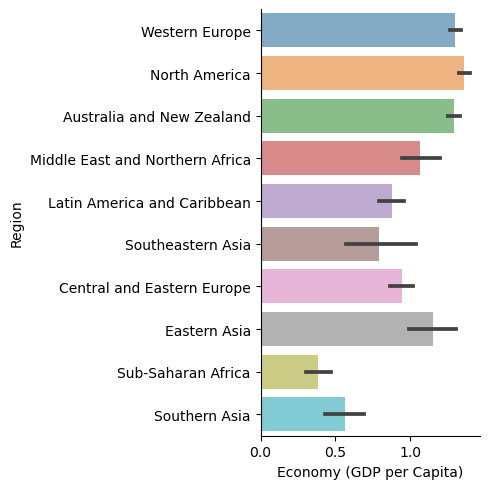

In [8]:
data = Data2015
sns.catplot(x='Economy (GDP per Capita)', y='Region', data=data, kind="bar", alpha=.6)
plt.show()

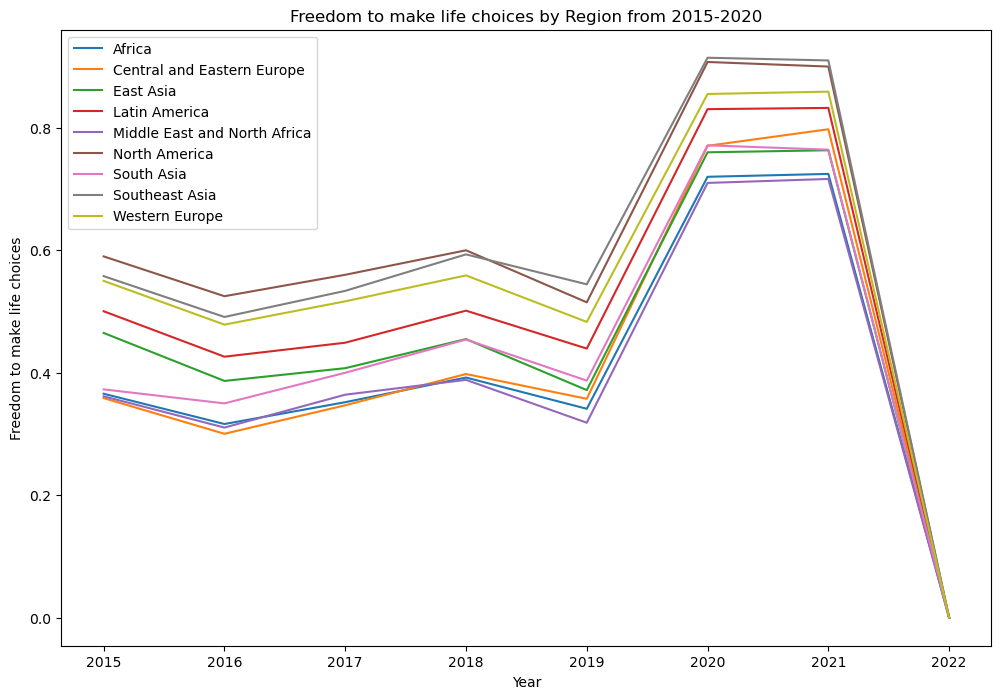

In [94]:
# Create a dictionary to map similar regions together
region_dict = {
    'Southern Asia': 'South Asia',
    'Middle East and Northern Africa': 'Middle East and North Africa',
    'Sub-Saharan Africa': 'Africa',
    'Latin America and Caribbean': 'Latin America',
    'Commonwealth of Independent States': 'CIS',
    'Australia and New Zealand': 'ANZ',
    'North America and ANZ': 'North America',
    'Southeastern Asia': 'Southeast Asia',
    'Eastern Asia': 'East Asia'
}

# Replace the incorrect region spellings with the correct ones
DataAllRegion['Region'] = DataAllRegion['Region'].replace(region_dict)

# Drop rows containing 'ANZ' or 'CIS' in the 'Region' column
DataAllRegion = DataAllRegion[~DataAllRegion['Region'].isin(['ANZ', 'CIS'])]

# Replace any other regions with the appropriate values using region_dict
DataAllRegion.loc[:, 'Region'] = DataAllRegion['Region'].replace(region_dict)

# Create a new dataframe with region-wise average happiness score for each year
region_data = DataAllRegion.groupby(['Year', 'Region'])['Freedom to make life choices'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for region in region_data['Region'].unique():
    # Get the data for the current region
    region_subset = region_data[region_data['Region'] == region]
    # Plot the region's data
    ax.plot(region_subset['Year'], region_subset['Freedom to make life choices'], label=region)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Freedom to make life choices')
ax.set_title('Freedom to make life choices by Region from 2015-2020')

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Show the plot
plt.show()

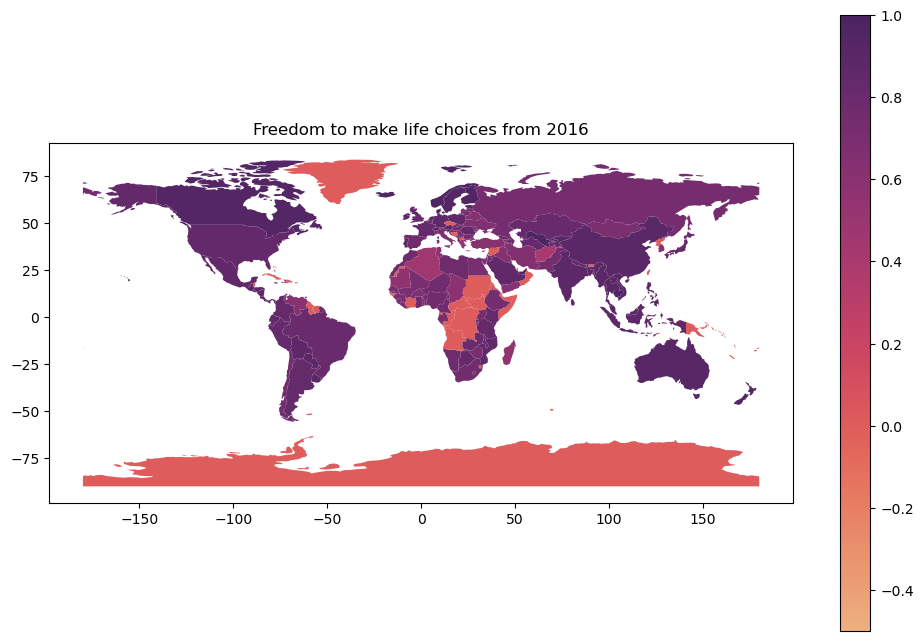

In [86]:
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the projection of the world map to WGS84
world = world.to_crs(epsg=4326)
data = Data2020.groupby('Country')['Freedom to make life choices'].mean().reset_index()

data.rename(columns={'Country': 'name'}, inplace=True)

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Freedom to make life choices'] = world_data['Freedom to make life choices'].map(data.set_index('name')['Freedom to make life choices'])

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Freedom to make life choices'].fillna(0, inplace=True)

# Create the heatmap on the world map
fig, ax = plt.subplots(figsize=(12, 8))
world_data.plot(column='Freedom to make life choices', cmap='flare', legend=True, ax=ax, vmin=-0., vmax=1)
ax.set_title('Freedom to make life choices from 2016')
plt.show()

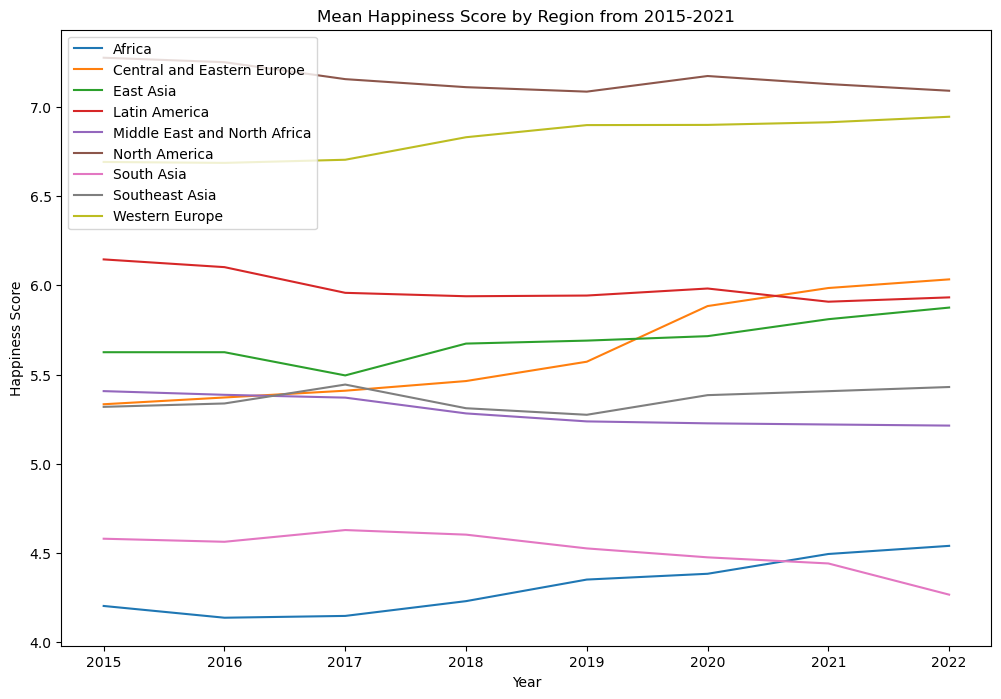

In [81]:
# Create a dictionary to map similar regions together
region_dict = {
    'Southern Asia': 'South Asia',
    'Middle East and Northern Africa': 'Middle East and North Africa',
    'Sub-Saharan Africa': 'Africa',
    'Latin America and Caribbean': 'Latin America',
    'Commonwealth of Independent States': 'CIS',
    'Australia and New Zealand': 'ANZ',
    'North America and ANZ': 'North America',
    'Southeastern Asia': 'Southeast Asia',
    'Eastern Asia': 'East Asia'
}

# Replace the incorrect region spellings with the correct ones
DataAllRegion['Region'] = DataAllRegion['Region'].replace(region_dict)

# Drop rows containing 'ANZ' or 'CIS' in the 'Region' column
DataAllRegion = DataAllRegion[~DataAllRegion['Region'].isin(['ANZ', 'CIS'])]

# Replace any other regions with the appropriate values using region_dict
DataAllRegion.loc[:, 'Region'] = DataAllRegion['Region'].replace(region_dict)

# Create a new dataframe with region-wise average happiness score for each year
region_data = DataAllRegion.groupby(['Year', 'Region'])['Happiness Score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for region in region_data['Region'].unique():
    # Get the data for the current region
    region_subset = region_data[region_data['Region'] == region]
    # Plot the region's data
    ax.plot(region_subset['Year'], region_subset['Happiness Score'], label=region)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Mean Happiness Score by Region from 2015-2021')

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Show the plot
plt.show()

After creating this chart I have realized the data has some different anmes for certain areas that I have to change.
- I fixed the names 